<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [22]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [23]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [24]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


Provide a  bar plot for the Charles river variable
. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Owner-occupied homes')

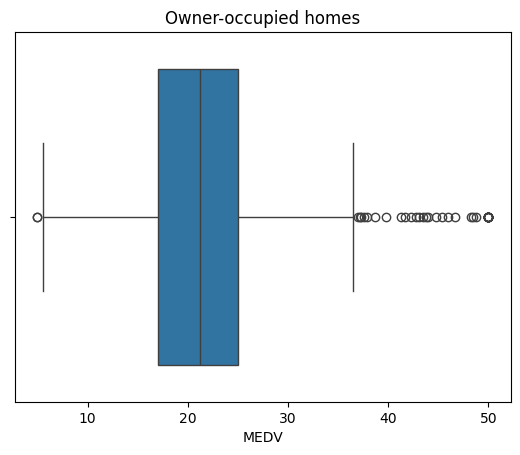

In [36]:
# For the "Median value of owner-occupied homes" provide a boxplot
bplot=sns.boxplot(x = boston_df['MEDV'])
bplot.set_title('Owner-occupied homes')

0.0    471
1.0     35
Name: CHAS, dtype: int64


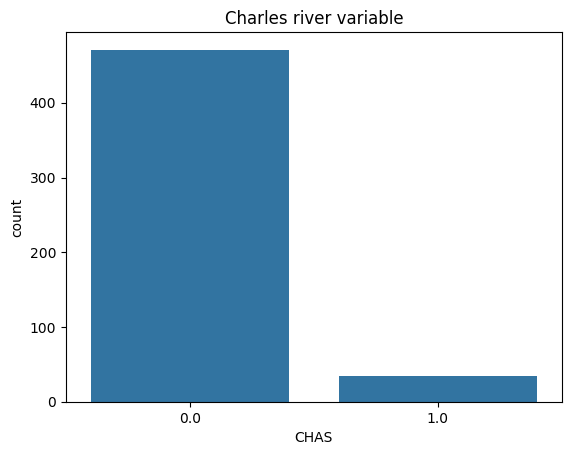

In [61]:
#Provide a  bar plot for the Charles river variable
bar_plot=sns.countplot(x = 'CHAS', data = boston_df)
bar_plot.set_title('Charles river variable')
#print(boston_df['CHAS'].value_counts())


Text(0.5, 1.0, 'MEDV variable vs the AGE variable')

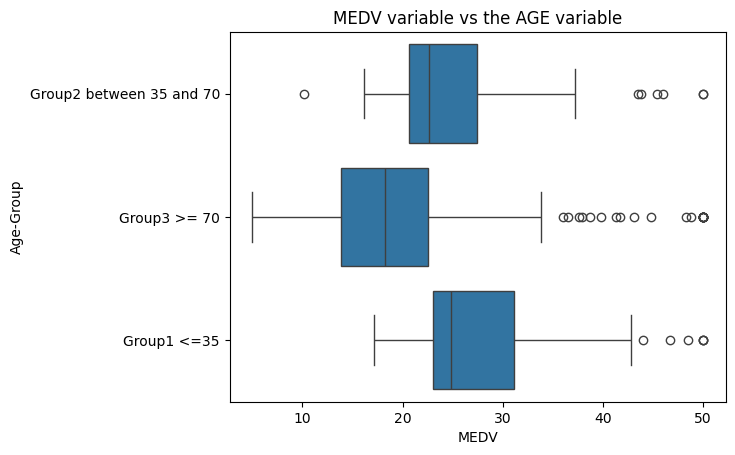

In [73]:
# Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <=35), 'Age-Group'] = 'Group1 <=35'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age-Group']= 'Group2 between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age-Group']= 'Group3 >= 70'
box_plot= sns.boxplot(data=boston_df, x='MEDV', y='Age-Group')
box_plot.set_title('MEDV variable vs the AGE variable')

Text(0.5, 1.0, 'Nitric oxide concentrations vs The proportion of non-retail business acres per town')

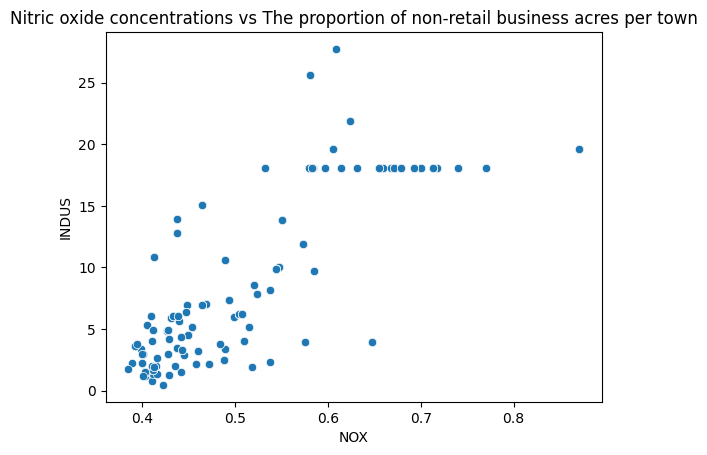

In [76]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
# What can you say about the relationship?
snox_vs_indus=sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
snox_vs_indus.set_title('Nitric oxide concentrations vs The proportion of non-retail business acres per town')

Text(0.5, 1.0, 'Pupil to teacher ratio')

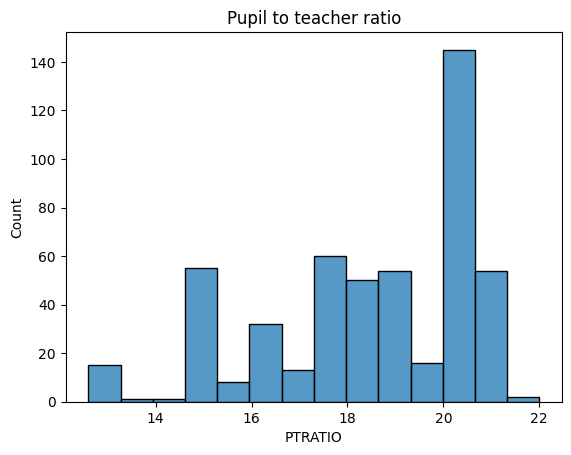

In [82]:
# Create a histogram for the pupil to teacher ratio variable
hist_plot=sns.histplot(boston_df['PTRATIO'])
hist_plot.set_title('Pupil to teacher ratio')

Question1:
Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)?

Hypothesis:
Null Hypothesis (H0): There is no significant difference in median value of houses bounded by the Charles river 
Alternative Hypothesis (H1): There is a significant difference in median value of houses bounded by the Charles river 
α = 0.05


In [90]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0].MEDV,
                   boston_df[boston_df['CHAS'] == 1].MEDV, equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Answer:
The pvalue < 0.05 --> reject the H0.
That means that there is a significant difference in median value of houses bounded by the Charles river

Question2:
Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis:
Null Hypothesis (H0): There is no difference in Median values of houses occupied units built prior to 1940 
Alternative Hypothesis (H1): There is a difference in Median values of houses occupied units built prior to 1940 
α = 0.05

In [97]:
boston_df.loc[(boston_df['AGE'] <=84), 'Age_Group'] = 'Group1 <= 80'
boston_df.loc[(boston_df['AGE'] > 84), 'Age_Group'] = 'Group2 > 80'
scipy.stats.levene(boston_df[boston_df.Age_Group == 'Group1 <= 80']['MEDV'], boston_df[boston_df.Age_Group == 'Group2 > 80']['MEDV'],center='mean')

LeveneResult(statistic=1.4055510245413045, pvalue=0.2363550102480432)

Answer:
The pvalue > 0.05 -->  --> accept the H0.
That means that there is no difference in Median values of houses occupied units built prior to 1940 

Question3:
Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis:
Null Hypothesis (H0): There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
Alternative Hypothesis (H1): There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
α = 0.05

In [100]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Answer:
The pvalue < 0.05 --> reject the H0.
That means that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

Question4: 
What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Hypothesis:
Null Hypothesis (H0): There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
Alternative Hypothesis (H1): There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
α = 0.05

In [101]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x) 
model=sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        08:45:16   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Answer: The pvalue < 0.05 --> reject the H0.
The DIS = 1.0916 means that there is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes 